In [1]:
import os
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
import pandas as pd
from sqlalchemy import create_engine


pg_user = os.getenv("POSTGRES_USER", " ")
pg_password = os.getenv("POSTGRES_PASSWORD", " ")
pg_host = os.getenv("POSTGRES_HOST", " ")
pg_port = os.getenv("POSTGRES_PORT", " ")
pg_db = os.getenv("POSTGRES_DATABASE", " ")

engine = create_engine(
    f"postgresql://{pg_user}:{pg_password}"
    f"{pg_host}:{pg_port}/{pg_db}"
)




user_data = pd.read_sql('SELECT * FROM public.user_data;', con=engine) # считываем таблицу
user_data

,user_id,gender,age,country,city,exp_group,os,source
0,200,1,34,Russia,Degtyarsk,3,Android,ads
1,201,0,37,Russia,Abakan,0,Android,ads
2,202,1,17,Russia,Smolensk,4,Android,ads
3,203,0,18,Russia,Moscow,1,iOS,ads
4,204,0,36,Russia,Anzhero-Sudzhensk,3,Android,ads
...,...,...,...,...,...,...,...,...
163200,168548,0,36,Russia,Kaliningrad,4,Android,organic
163201,168549,0,18,Russia,Tula,2,Android,organic
163202,168550,1,41,Russia,Yekaterinburg,4,Android,organic
163203,168551,0,38,Russia,Moscow,3,iOS,organic


In [3]:
print(pg_user)
print(pg_password)
print(pg_host)
print(pg_port)
print(pg_db)

robot-startml-ro
pheiph0hahj1Vaif@
postgres.lab.karpov.courses
6432
startml


In [4]:
user_data.isna().sum()

user_id      0
gender       0
age          0
country      0
city         0
exp_group    0
os           0
source       0
dtype: int64

In [5]:
user_data.describe()    

,user_id,gender,age,exp_group
count,163205.000000,163205.000000,163205.000000,163205.000000
mean,85070.371759,0.551331,27.195405,1.997598
std,48971.639950,0.497360,10.239158,1.413644
min,200.000000,0.000000,14.000000,0.000000
25%,41030.000000,0.000000,19.000000,1.000000
50%,85511.000000,1.000000,24.000000,2.000000
75%,127733.000000,1.000000,33.000000,3.000000
max,168552.000000,1.000000,95.000000,4.000000


In [6]:
user_data_categorical = user_data.loc[:, user_data.dtypes == np.object_].columns.tolist()
user_data_categorical

['country', 'city', 'os', 'source']

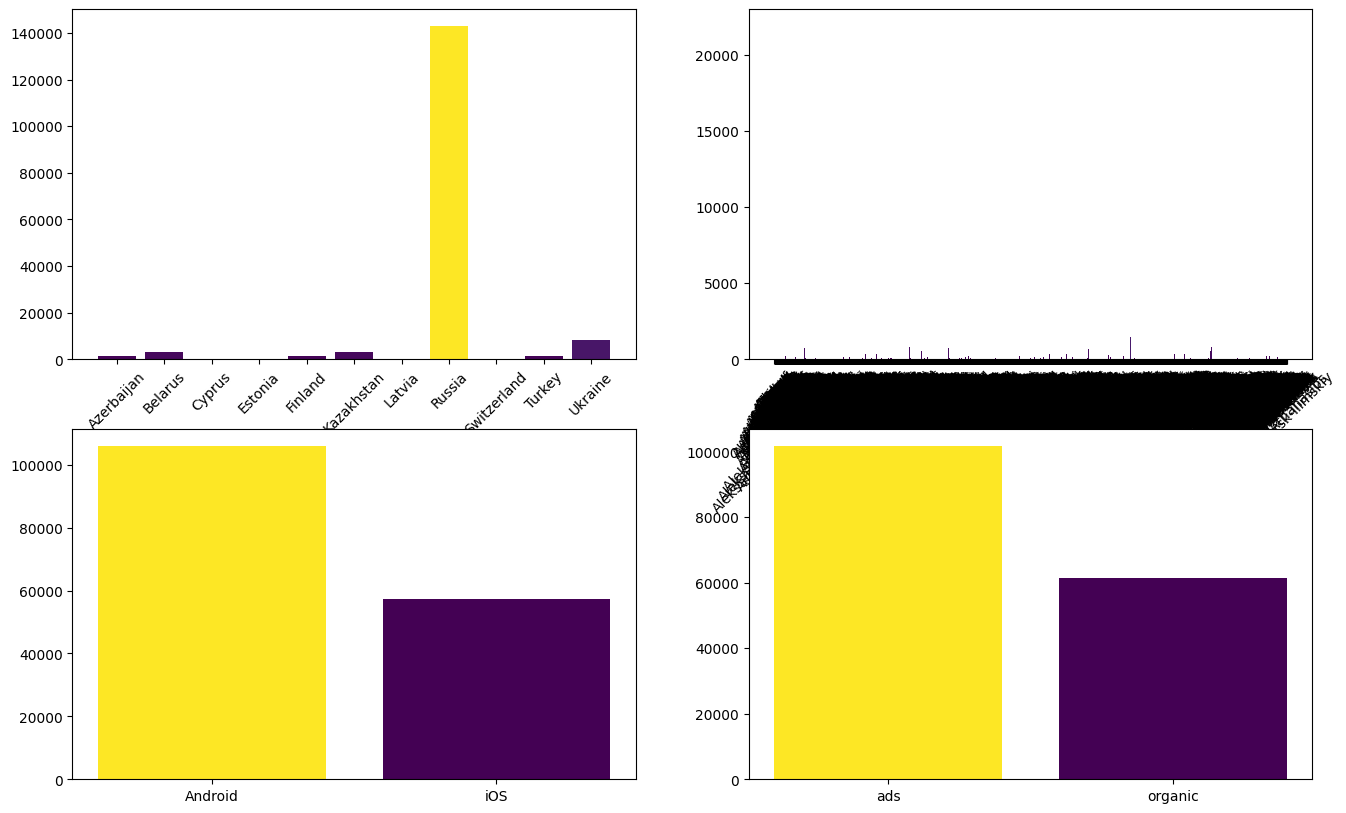

In [7]:
fig = plt.figure(figsize=(16, 10))

ax1 = fig.add_subplot(2, 2, 1)

cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

for_hist = user_data.groupby("country").size()
plt.bar(for_hist.index, for_hist.values, color=cmap(rescale(for_hist.values)))
plt.xticks(rotation=45)

ax2 = fig.add_subplot(2, 2, 2)
for_hist = user_data.groupby("city").size()
plt.bar(for_hist.index, for_hist.values, color=cmap(rescale(for_hist.values)))
plt.xticks(rotation=45)

ax3 = fig.add_subplot(2, 2, 3)
for_hist = user_data.groupby("os").size()
plt.bar(for_hist.index, for_hist.values, color=cmap(rescale(for_hist.values)))


ax4 = fig.add_subplot(2, 2, 4)
for_hist = user_data.groupby("source").size()
plt.bar(for_hist.index, for_hist.values, color=cmap(rescale(for_hist.values)))

plt.show()


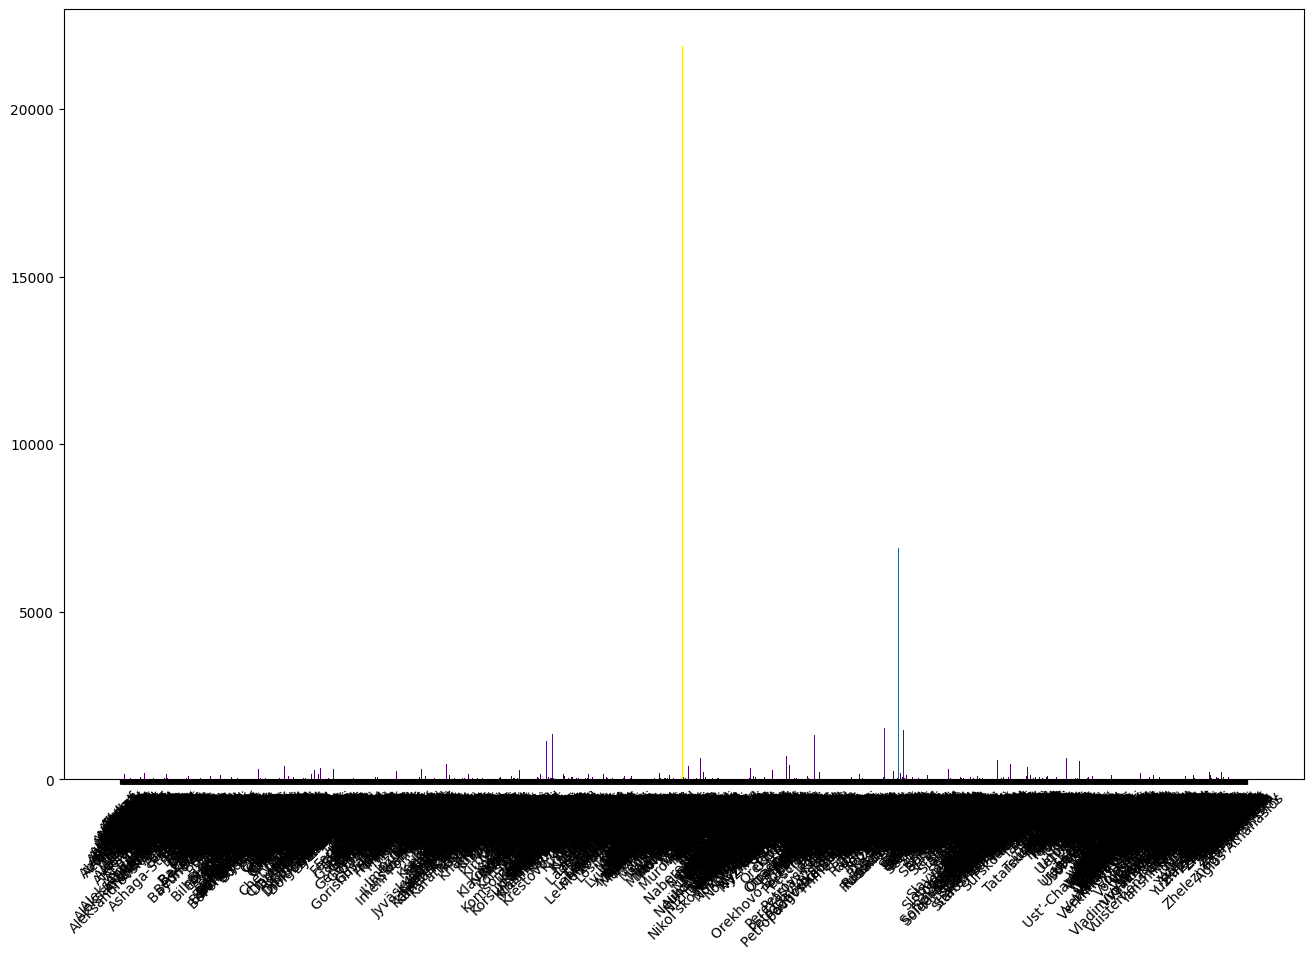

In [8]:
fig = plt.figure(figsize=(16, 10))
for_hist = user_data.groupby("city").size()
plt.bar(for_hist.index, for_hist.values, color=cmap(rescale(for_hist.values)))
plt.xticks(rotation=45)

plt.show()

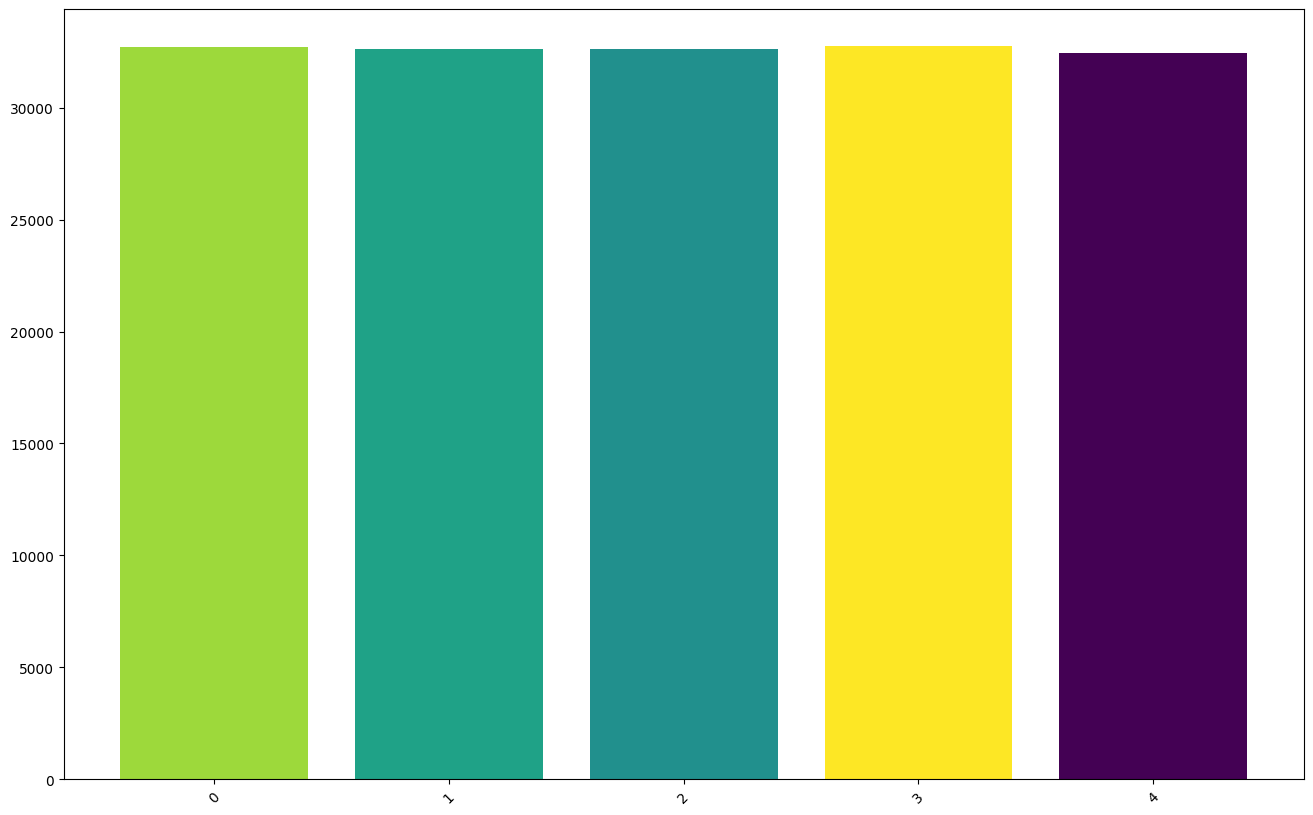

In [8]:
fig = plt.figure(figsize=(16, 10))
for_hist = user_data.groupby("exp_group").size()
plt.bar(for_hist.index, for_hist.values, color=cmap(rescale(for_hist.values)))
plt.xticks(rotation=45)

plt.show()

In [9]:
user_data.describe(include='object')

,country,city,os,source
count,163205,163205,163205,163205
unique,11,3915,2,2
top,Russia,Moscow,Android,ads
freq,143035,21874,105972,101685


In [9]:
user_data = user_data.drop(["exp_group"], axis=1)

In [10]:
post_text_df = pd.read_sql('SELECT * FROM public.post_text_df;', con=engine) # считываем таблицу
post_text_df

,post_id,text,topic
0,1,UK economy facing major risks\n\nThe UK manufa...,business
1,2,Aids and climate top Davos agenda\n\nClimate c...,business
2,3,Asian quake hits European shares\n\nShares in ...,business
3,4,India power shares jump on debut\n\nShares in ...,business
4,5,Lacroix label bought by US firm\n\nLuxury good...,business
...,...,...,...
7018,7315,"OK, I would not normally watch a Farrelly brot...",movie
7019,7316,I give this movie 2 stars purely because of it...,movie
7020,7317,I cant believe this film was allowed to be mad...,movie
7021,7318,The version I saw of this film was the Blockbu...,movie


In [11]:
post_text_df.describe(include = "object")

,text,topic
count,7023,7023
unique,6924,7
top,Microsoft gets the blogging bug\n\nSoftware gi...,movie
freq,2,3000


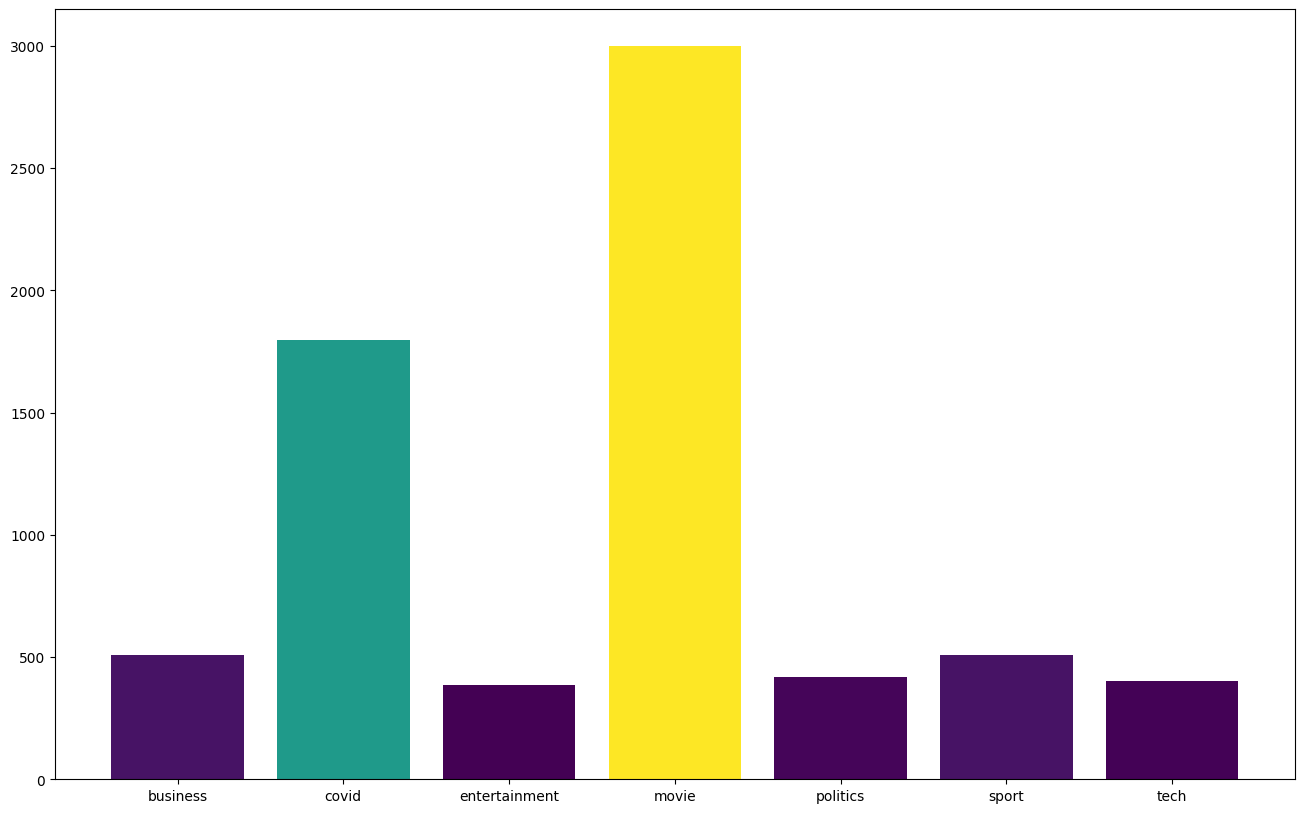

In [12]:
fig = plt.figure(figsize=(16, 10))
for_hist = post_text_df.groupby("topic").size()
plt.bar(for_hist.index, for_hist.values, color=cmap(rescale(for_hist.values)))
plt.show()

In [13]:
post_text_df['text'] = post_text_df['text'].apply(lambda x: x.replace("\n", " "))
post_text_df

,post_id,text,topic
0,1,UK economy facing major risks The UK manufact...,business
1,2,Aids and climate top Davos agenda Climate cha...,business
2,3,Asian quake hits European shares Shares in Eu...,business
3,4,India power shares jump on debut Shares in In...,business
4,5,Lacroix label bought by US firm Luxury goods ...,business
...,...,...,...
7018,7315,"OK, I would not normally watch a Farrelly brot...",movie
7019,7316,I give this movie 2 stars purely because of it...,movie
7020,7317,I cant believe this film was allowed to be mad...,movie
7021,7318,The version I saw of this film was the Blockbu...,movie


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
stop_words = pd.read_csv("../data/stop_words.csv")["word"].values.tolist()

vectorizer = TfidfVectorizer(stop_words=stop_words,
                             max_features = 30,
                             max_df = 0.95,
                             min_df = 0.01)


tfidf_matrix = vectorizer.fit_transform(post_text_df["text"])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns = vectorizer.get_feature_names_out())

tfidf_df

,10,bad,characters,covid19,director,film,films,game,good,government,...,show,story,time,told,uk,watch,work,world,year,years
0,0.000000,0.000000,0.0,0.0,0.218346,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.715425,0.000000,0.000000,0.000000,0.350682,0.366031
1,0.000000,0.202292,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.147459,0.000000,0.229744,0.000000,0.000000,0.767063,0.000000,0.176316
2,0.701600,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.258784,0.366061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.266424,0.770531,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.319704,0.000000,0.000000
4,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.212026,0.165636,0.000000,0.000000,0.701437,0.000000,0.000000,0.000000,0.000000
7019,0.000000,0.000000,0.0,0.0,0.000000,0.214756,0.0,0.0,0.000000,0.000000,...,0.308632,0.000000,0.000000,0.000000,0.000000,0.000000,0.290235,0.000000,0.000000,0.000000
7020,0.294437,0.000000,0.0,0.0,0.000000,0.874796,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.306607,0.000000,0.000000,0.000000,0.000000
7021,0.000000,0.000000,0.0,0.0,0.000000,0.719241,0.0,0.0,0.000000,0.000000,...,0.000000,0.457195,0.357165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
post_data = pd.concat([post_text_df, tfidf_df], axis = 1)
post_data

,post_id,text,topic,10,bad,characters,covid19,director,film,films,...,show,story,time,told,uk,watch,work,world,year,years
0,1,UK economy facing major risks The UK manufact...,business,0.000000,0.000000,0.0,0.0,0.218346,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.715425,0.000000,0.000000,0.000000,0.350682,0.366031
1,2,Aids and climate top Davos agenda Climate cha...,business,0.000000,0.202292,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.147459,0.000000,0.229744,0.000000,0.000000,0.767063,0.000000,0.176316
2,3,Asian quake hits European shares Shares in Eu...,business,0.701600,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.258784,0.366061,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,4,India power shares jump on debut Shares in In...,business,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.319704,0.000000,0.000000
4,5,Lacroix label bought by US firm Luxury goods ...,business,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,7315,"OK, I would not normally watch a Farrelly brot...",movie,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.212026,0.165636,0.000000,0.000000,0.701437,0.000000,0.000000,0.000000,0.000000
7019,7316,I give this movie 2 stars purely because of it...,movie,0.000000,0.000000,0.0,0.0,0.000000,0.214756,0.0,...,0.308632,0.000000,0.000000,0.000000,0.000000,0.000000,0.290235,0.000000,0.000000,0.000000
7020,7317,I cant believe this film was allowed to be mad...,movie,0.294437,0.000000,0.0,0.0,0.000000,0.874796,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.306607,0.000000,0.000000,0.000000,0.000000
7021,7318,The version I saw of this film was the Blockbu...,movie,0.000000,0.000000,0.0,0.0,0.000000,0.719241,0.0,...,0.000000,0.457195,0.357165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
feed_data = pd.read_sql("SELECT * FROM public.feed_data LIMIT 50000", con=engine) # считываем таблицу

In [18]:
feed_data.head(30)

,timestamp,user_id,post_id,action,target
0,2021-11-05 18:35:53,147042,3959,view,1
1,2021-11-05 18:37:45,147042,3959,like,0
2,2021-11-05 18:37:47,147042,1543,view,1
3,2021-11-05 18:40:25,147042,1543,like,0
4,2021-11-05 18:40:27,147042,1536,view,0
5,2021-11-05 18:43:08,147042,3630,view,0
6,2021-11-05 18:44:36,147042,7106,view,0
7,2021-11-05 18:45:53,147042,1413,view,0
8,2021-11-05 18:46:43,147042,1856,view,0
9,2021-11-05 18:48:39,147042,5419,view,1


In [19]:
feed_data.isna().sum()

timestamp    0
user_id      0
post_id      0
action       0
target       0
dtype: int64

In [20]:
feed_data.describe()

,user_id,post_id,target
count,50000.000000,50000.000000,50000.00000
mean,115887.028820,3398.203480,0.10392
std,46406.945039,2094.009412,0.30516
min,49355.000000,1.000000,0.00000
25%,49381.000000,1526.750000,0.00000
50%,147051.000000,3205.000000,0.00000
75%,147079.000000,5188.000000,0.00000
max,159482.000000,7319.000000,1.00000


In [21]:
feed_data.describe(include = "object")

,action
count,50000
unique,2
top,view
freq,44804


In [22]:
feed_data['timestamp'] = pd.to_datetime(feed_data['timestamp'])
feed_data['hour_of_day'] = feed_data['timestamp'].dt.hour
feed_data['day_of_week'] = feed_data['timestamp'].dt.day_of_week

In [23]:
feed_data.head()

,timestamp,user_id,post_id,action,target,hour_of_day,day_of_week
0,2021-11-05 18:35:53,147042,3959,view,1,18,4
1,2021-11-05 18:37:45,147042,3959,like,0,18,4
2,2021-11-05 18:37:47,147042,1543,view,1,18,4
3,2021-11-05 18:40:25,147042,1543,like,0,18,4
4,2021-11-05 18:40:27,147042,1536,view,0,18,4


In [24]:
feed_data.sort_values(by='timestamp')
feed_data = feed_data.drop_duplicates(subset=["user_id", "post_id"], keep="first")

In [25]:
feed_data.head(10)

,timestamp,user_id,post_id,action,target,hour_of_day,day_of_week
0,2021-11-05 18:35:53,147042,3959,view,1,18,4
2,2021-11-05 18:37:47,147042,1543,view,1,18,4
4,2021-11-05 18:40:27,147042,1536,view,0,18,4
5,2021-11-05 18:43:08,147042,3630,view,0,18,4
6,2021-11-05 18:44:36,147042,7106,view,0,18,4
7,2021-11-05 18:45:53,147042,1413,view,0,18,4
8,2021-11-05 18:46:43,147042,1856,view,0,18,4
9,2021-11-05 18:48:39,147042,5419,view,1,18,4
11,2021-11-05 18:48:59,147042,1356,view,0,18,4
12,2021-11-05 18:49:41,147042,3488,view,0,18,4


In [26]:
feed_data = feed_data.drop(["action"], axis=1)

In [27]:
merged_df = feed_data.merge(user_data, on="user_id", how="left")
merged_df = merged_df.merge(post_data, on="post_id", how="left")
merged_df = merged_df.drop(["user_id", "post_id"], axis=1)

In [28]:
merged_df

,timestamp,target,hour_of_day,day_of_week,gender,age,country,city,os,source,...,show,story,time,told,uk,watch,work,world,year,years
0,2021-11-05 18:35:53,1,18,4,0,20,Russia,Bratsk,Android,organic,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,2021-11-05 18:37:47,1,18,4,0,20,Russia,Bratsk,Android,organic,...,0.000000,0.000000,0.240688,0.340463,0.0,0.000000,0.000000,0.313006,0.275720,0.000000
2,2021-11-05 18:40:27,0,18,4,0,20,Russia,Bratsk,Android,organic,...,0.000000,0.000000,0.095192,0.134653,0.0,0.268745,0.259065,0.000000,0.000000,0.113820
3,2021-11-05 18:43:08,0,18,4,0,20,Russia,Bratsk,Android,organic,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,2021-11-05 18:44:36,0,18,4,0,20,Russia,Bratsk,Android,organic,...,0.000000,0.000000,0.144633,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42789,2021-10-02 18:59:15,0,18,5,1,21,Russia,Moscow,Android,organic,...,0.000000,0.000000,0.378676,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
42790,2021-10-02 19:00:17,0,19,5,1,21,Russia,Moscow,Android,organic,...,0.000000,0.000000,0.165922,0.000000,0.0,0.234215,0.000000,0.000000,0.000000,0.000000
42791,2021-10-02 19:02:29,0,19,5,1,21,Russia,Moscow,Android,organic,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.340411,0.710622
42792,2021-10-02 19:02:59,0,19,5,1,21,Russia,Moscow,Android,organic,...,0.210602,0.186305,0.291086,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [29]:
merged_df = merged_df.drop(["timestamp"], axis=1)
merged_df.to_csv('../data/merged_data.csv', index=False, sep=";")

In [30]:
merged_df

,target,hour_of_day,day_of_week,gender,age,country,city,os,source,text,...,show,story,time,told,uk,watch,work,world,year,years
0,1,18,4,0,20,Russia,Bratsk,Android,organic,MOP Brandon Banks doubles down on 2020 #CFL se...,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,18,4,0,20,Russia,Bratsk,Android,organic,Hodgson relishes European clashes Former Blac...,...,0.000000,0.000000,0.240688,0.340463,0.0,0.000000,0.000000,0.313006,0.275720,0.000000
2,0,18,4,0,20,Russia,Bratsk,Android,organic,Houllier praises Benitez regime Former Liverp...,...,0.000000,0.000000,0.095192,0.134653,0.0,0.268745,0.259065,0.000000,0.000000,0.113820
3,0,18,4,0,20,Russia,Bratsk,Android,organic,sad when people dont care about others safety ...,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0,18,4,0,20,Russia,Bratsk,Android,organic,Margret Laurence probably didnt intend on havi...,...,0.000000,0.000000,0.144633,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42789,0,18,5,1,21,Russia,Moscow,Android,organic,How to smash a home computer An executive who...,...,0.000000,0.000000,0.378676,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
42790,0,19,5,1,21,Russia,Moscow,Android,organic,I dont think any movie of Van Dammes will ever...,...,0.000000,0.000000,0.165922,0.000000,0.0,0.234215,0.000000,0.000000,0.000000,0.000000
42791,0,19,5,1,21,Russia,Moscow,Android,organic,Consumers drive French economy Frances econom...,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.340411,0.710622
42792,0,19,5,1,21,Russia,Moscow,Android,organic,I enjoy all the versions of this story but thi...,...,0.210602,0.186305,0.291086,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [31]:
import os
import pandas as pd
from sqlalchemy import create_engine
import pickle
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

from sklearn.model_selection import TimeSeriesSplit

In [32]:
merged_df = merged_df.drop(["text"], axis=1)

In [33]:
merged_df.groupby("target").size()

counts = merged_df['target'].value_counts()


In [37]:
X = merged_df.drop(["target"], axis=1)
y = merged_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorial_cols = ["hour_of_day", "day_of_week", "city", "country", "os", "source", "topic"]
cat_features = [X_train.columns.get_loc(col) for col in categorial_cols]
print(X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostClassifier(iterations = 1000,
                           depth = 6,
                           learning_rate= 0.1,
                           custom_metric='AUC',
                           eval_metric='AUC',
                           verbose = 100)

model.fit(X_train, y_train, cat_features=cat_features)

print("Accuracy: ", accuracy_score(y_test, model.predict(X_test)))
print("Precision: ", precision_score(y_test, model.predict(X_test)))
print("Recall:", recall_score(y_test, model.predict(X_test)))
print("ROC_AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

Index(['hour_of_day', 'day_of_week', 'gender', 'age', 'country', 'city', 'os',
       'source', 'topic', '10', 'bad', 'characters', 'covid19', 'director',
       'film', 'films', 'game', 'good', 'government', 'great', 'https', 'life',
       'man', 'movie', 'movies', 'music', 'part', 'people', 'set', 'show',
       'story', 'time', 'told', 'uk', 'watch', 'work', 'world', 'year',
       'years'],
      dtype='object')
0:	total: 67ms	remaining: 1m 6s
100:	total: 5.55s	remaining: 49.5s
200:	total: 11.4s	remaining: 45.5s
300:	total: 17.3s	remaining: 40.2s
400:	total: 23.4s	remaining: 35s
500:	total: 29.7s	remaining: 29.6s
600:	total: 35.8s	remaining: 23.8s
700:	total: 41.3s	remaining: 17.6s
800:	total: 47.6s	remaining: 11.8s
900:	total: 53.2s	remaining: 5.84s
999:	total: 58.5s	remaining: 0us
Accuracy:  0.8831639210188106
Precision:  0.5
Recall: 0.005
ROC_AUC: 0.6264823389337214


In [41]:
X = merged_df.drop(["target"], axis=1)
y = merged_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorial_cols = ["hour_of_day", "day_of_week", "city", "country", "os", "source", "topic"]
cat_features = [X_train.columns.get_loc(col) for col in categorial_cols]
print(X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostClassifier(iterations = 1000,
                           depth = 6,
                           learning_rate= 0.1,
                           custom_metric='AUC',
                           eval_metric='AUC',
                           verbose = 100)

model.fit(X_train, y_train, cat_features=cat_features)

print("Accuracy: ", accuracy_score(y_test, model.predict(X_test)))
print("Precision: ", precision_score(y_test, model.predict(X_test), average='weighted'))
print("Recall:", recall_score(y_test, model.predict(X_test), average='weighted'))
print("ROC_AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1], ))

Index(['hour_of_day', 'day_of_week', 'gender', 'age', 'country', 'city', 'os',
       'source', 'topic', '10', 'bad', 'characters', 'covid19', 'director',
       'film', 'films', 'game', 'good', 'government', 'great', 'https', 'life',
       'man', 'movie', 'movies', 'music', 'part', 'people', 'set', 'show',
       'story', 'time', 'told', 'uk', 'watch', 'work', 'world', 'year',
       'years'],
      dtype='object')
0:	total: 60.6ms	remaining: 1m
100:	total: 5.81s	remaining: 51.7s
200:	total: 11.7s	remaining: 46.7s
300:	total: 17.6s	remaining: 40.8s
400:	total: 23s	remaining: 34.4s
500:	total: 28.6s	remaining: 28.5s
600:	total: 34.2s	remaining: 22.7s
700:	total: 40.3s	remaining: 17.2s
800:	total: 45.9s	remaining: 11.4s
900:	total: 51.2s	remaining: 5.62s
999:	total: 56.5s	remaining: 0us
Accuracy:  0.8831639210188106
Precision:  0.8387923826156497
Recall: 0.8831639210188106
ROC_AUC: 0.6264823389337214
